         Date        Open        High         Low       Close   Adj Close  \
0  2013-01-02  357.385559  361.151062  355.959839  359.288177  359.288177   
1  2013-01-03  360.122742  363.600128  358.031342  359.496826  359.496826   
2  2013-01-04  362.313507  368.339294  361.488861  366.600616  366.600616   
3  2013-01-07  365.348755  367.301056  362.929504  365.001007  365.001007   
4  2013-01-08  365.393463  365.771027  359.874359  364.280701  364.280701   

    Volume  
0  5115500  
1  4666500  
2  5562800  
3  3332900  
4  3373900  
         Date         Open         High          Low        Close  \
0  2018-01-02  1048.339966  1066.939941  1045.229980  1065.000000   
1  2018-01-03  1064.310059  1086.290039  1063.209961  1082.479980   
2  2018-01-04  1088.000000  1093.569946  1084.001953  1086.400024   
3  2018-01-05  1094.000000  1104.250000  1092.000000  1102.229980   
4  2018-01-08  1102.229980  1111.270020  1101.619995  1106.939941   

     Adj Close   Volume  
0  1065.000000  12

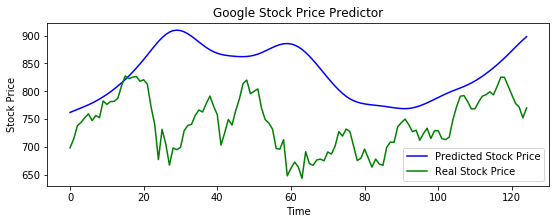

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
plt.get_backend()

#Step 1. Importing the data

data_source = r'trainset.csv'
data = pd.read_csv(data_source)
data_source2 = r'testset.csv'
data2 = pd.read_csv(data_source2 )
print(data.head())
print(data2.head())
trainer = data
tester = data2


#Step 2. Feature scaling with Min Max Scaler

data_trainer = trainer.drop(['Date', 'Adj Close'], axis = 1)
sc = MinMaxScaler(feature_range = (0, 1))
data_trainer = sc.fit_transform(data_trainer)


#Step 3. Reshaping the training data into an acceptable form of the LSTM
 
X_train = []
y_train = []
for i in range(60, 1259):
    X_train.append(data_trainer[i-60:i])
    y_train.append(data_trainer[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)



#Step 4. Preparing the Sequential LSTM Model

model = Sequential()

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.0))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.0))

model.add(LSTM(units = 120, activation = 'relu', return_sequences = True))
model.add(Dropout(0.0))

model.add(LSTM(units = 140))
model.add(Dropout(0.0))

model.add(Dense(units = 1))

model.summary()


#Step 5. Compiling the Model and implementing the learning algorithm

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 35)

#Step 6. Preparing the testing dataset, feature scaling and reshaping

past60 = trainer.tail(60)
final_trainer = past60.append(tester,ignore_index='True')
final_trainer = final_trainer.drop(['Date','Adj Close'],axis=1)
inputs = sc.transform(final_trainer)
X_test = []
y_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
X_test,y_test = np.array(X_test),np.array(y_test)


#Step 7. Predicting the data from the testing set

y_pred = model.predict(X_test)


#Step 8. Scaling back the data into Original Format

scale = 1/1.37903131e-03 #this is the factor obtained by the first value of y_test
y_pred = y_pred*scale
y_test = y_test*scale

#Step 9. Visualization of the model prediction

plt.figure(figsize=(9,3))
plt.plot(y_pred, color = 'blue', label = 'Predicted Stock Price')
plt.plot(y_test, color = 'green', label = 'Real Stock Price')
plt.title('Google Stock Price Predictor')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()